# Data 604 Final Project

### State the Problem and its Significance

For my Data 604 final project I will be simulating a gas station. The problem is you are the new manager of a gas station and you are looking to renovate the gas station as you are looking to see how long it takes for someone to enter and exit the gas station. The simulation will look at the number of gas pumps in the gas station, the number of employees in the mini-market area of the gas station, and the number of air pumps in the gas station. Other areas that will be looked at are whether someone stops to buy something at the mini-market or use an air pump.

In [1]:
# Import libraries
import simpy
import random
import statistics
import matplotlib.pyplot as plt

### Simulation

In [2]:
class Gas_station(object): # Define Gas station as a class
    def __init__(self, env, number_gas_pump, number_employee, number_air_pump): 
        self.env = env # Get environment
        self.gas_pump = simpy.Resource(env, number_gas_pump) # Get number of gas pump 
        self.employee = simpy.Resource(env, number_employee) # Get number of employees 
        self.air_pump = simpy.Resource(env, number_air_pump) # Get number of air pumps
    def pump_gas(self, car): # Function to monitor the time to use gas pump
        yield self.env.timeout(random.randint(2, 5)) # Person takes between 2 and 5 minutes to pump gas
    def mini_market(self, car): # Function to monitor the time to buy at mini-market
        yield self.env.timeout(random.randint(1, 4)) # Person takes between 1 and 4 minutes to buy at mini-market
    def use_air_pump(self, car): # Function to monitor the time it takes to use air pump
        yield self.env.timeout(random.randint(1, 3)) # Person takes between 1 and 3 minutes to check air

In [3]:
time_spent = [] # Empty list to store how long each person spends at gas station

In [4]:
def arrive_at_gas_station(env, car, gas_station): # Function to simulate person arriving at gas station
    arrival_time = env.now # Get current time
    with gas_station.gas_pump.request() as req:
        yield req # Request gas pump
        yield env.process(gas_station.pump_gas(car)) # Use gas pump
    if random.choice([True, False]): # if statement to see if person uses mini-market
        with gas_station.employee.request() as req:
            yield req # Request employee
            yield env.process(gas_station.mini_market(car)) # Person going to use the mini-market
    if random.choice([True, False]): # if statement to see if person uses air pump
        with gas_station.air_pump.request() as req:
            yield req # Request air pump
            yield env.process(gas_station.use_air_pump(car)) # Use air pump
    time_spent.append(env.now - arrival_time) # Collect time spent at gas station

In [5]:
def simulate_gas_station(env, number_gas_pumps, number_employee, number_air_pump): # Function to simulate gas station
    gas_station = Gas_station(env, number_gas_pumps, number_employee, number_air_pump) # Create gas station
    for car in range(7): 
        env.process(arrive_at_gas_station(env, car, gas_station)) # Create process of someone arriving at gas station
    while True:
        yield env.timeout(1) # Time it takes between each person arriving at gas station
        car += 1 # Add a new person
        env.process(arrive_at_gas_station(env, car, gas_station)) # Create process of someone arrving at gas station

In [6]:
def total_time_spent(time_spent): # Function to show how long each person was at the gas station
    print(time_spent) # Print the list of time spent
    average = statistics.mean(time_spent) # Calculate average amount of time spent at gas station
    print("The average amount of time spent at gas station is ", average) # Print average time spent at gas station
    return time_spent, average

In [7]:
def run_simulation(number_gas_pump, number_employee, number_air_pump): # Function to run simulation
    random.seed(42) # Set seed
    env = simpy.Environment() # Create environment
    env.process(simulate_gas_station(env, number_gas_pump, number_employee, number_air_pump)) # Create processes
    env.run(until = 100) # Amount of time to run simulation
    results = total_time_spent(time_spent) # The amount of time spent stored when the simulation is ran
    return results

In [8]:
first_run = run_simulation(1, 1, 1) # Run simulation with 1 gas pump, 1 employee, and 1 air pump

[6, 8, 9, 13, 15, 19, 27, 27, 31, 31, 34, 34, 33, 42, 44, 43, 48, 50, 49, 53, 52, 55, 57, 63, 66, 70, 71, 73, 72]
The average amount of time spent at gas station is  41.206896551724135


In [8]:
second_run = run_simulation(2, 2, 2) # Run simulation with 2 gas pump, 2 employee, and 2 air pump

[3, 4, 9, 10, 11, 13, 14, 16, 17, 17, 20, 17, 20, 19, 21, 22, 22, 21, 25, 25, 24, 25, 26, 29, 29, 32, 33, 33, 32, 35, 34, 33, 33, 35, 36, 35, 37, 36, 41, 40, 43, 39, 42, 42, 41, 40, 39, 39, 44, 43, 42, 42, 48, 45, 47, 48, 49]
The average amount of time spent at gas station is  30.12280701754386


In [8]:
third_run = run_simulation(2, 2, 1) # Run simulation with 2 gas pump, 2 employee, and 1 air pump

[3, 4, 9, 11, 12, 13, 11, 16, 18, 16, 16, 18, 16, 17, 19, 17, 17, 19, 22, 20, 21, 20, 20, 21, 23, 27, 24, 27, 29, 28, 29, 27, 34, 29, 29, 34, 32, 34, 32, 35, 32, 35, 37, 34, 33, 37, 37, 36, 39, 44, 40, 41, 42, 42, 44, 45, 44]
The average amount of time spent at gas station is  26.50877192982456


In [8]:
fourth_run = run_simulation(100, 100, 100) # Run simulation with 100 gas pump, 100 employee, and 100 air pump

[3, 3, 3, 3, 5, 4, 5, 6, 2, 7, 3, 3, 3, 3, 11, 5, 10, 3, 4, 8, 6, 8, 6, 4, 10, 2, 3, 9, 3, 11, 9, 2, 8, 2, 8, 10, 6, 8, 5, 5, 8, 3, 7, 4, 7, 7, 4, 5, 9, 5, 8, 5, 6, 6, 6, 6, 9, 2, 6, 9, 5, 7, 5, 7, 9, 4, 5, 6, 4, 4, 4, 5, 4, 5, 9, 3, 7, 6, 6, 7, 5, 10, 5, 5, 5, 8, 6, 5, 6, 5, 11, 4, 4, 6, 3, 8, 4, 3, 2, 4]
The average amount of time spent at gas station is  5.62


### Validation and Verification of the Model

The validity of the model can be seen by the results shown. You are looking to see how long each person spends at the gas station and the model shows that. Different scenarios are shown to see how long a person spends at the gas station and the average time spent is also showed to get a better sense of the time spent at the gas station. The model is verified by the model is coded to have the user determine the number of number of gas pumps, number of employees, and number of air pumps they want at the gas station and the model shows the results based off this. The results shown are time spent at the gas station, and the average wait time is also included, based on these parameters. There are ways to make the verification of the model better since when running multiple simulation runs you have to restart the model and run it again with that specific run. If you run the model all together then the first simulation run shows an accurate results, but every run after that takes the results from the first run in addition to that run's results.

### Conclusions/Findings from the Model

The findings seen from the model are the time spent by a person at the gas station, and this is significantly different the more gas pumps and employees there are. Going from 1 pump, employee, and air pump to 2 of each decreases the average time spent at the gas station by almost 10 minutes. The number of air pumps isn't too important to the time spent. This can be seen by decreasing an air pump to 1 while having 2 gas pumps and employees gives a lower average time spent when compared to having 2 of each. 

In conclusion, the model runs a simulation where you input the number of gas pumps, employees, and air pumps and the model needs the number for each of these to be greater than 0, otherwise you get a ValueError. There are multiple simulation runs shown to give an idea of how the time spent would look with 1 to 2 gas pumps, employees, and air pumps. An unrealistic run of 100 gas pumps, employees, and air pumps is shown and the average time spent for this is about 5 minutes. The model does not take into account the budget you are working with to determine the actual number of gas pumps, employees, and air pumps you can afford. It also does not look at the amount of fuel a gas pump can hold and if/when the gas pump needs to be refueled. Taking these into account can help to improve the model. 

### Graphs

Text(0, 0.5, 'Time spent')

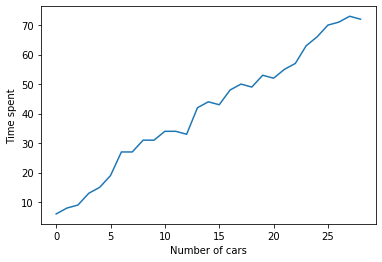

In [9]:
plt.plot(first_run[0])
plt.xlabel("Number of cars")
plt.ylabel("Time spent")

Text(0, 0.5, 'Time spent')

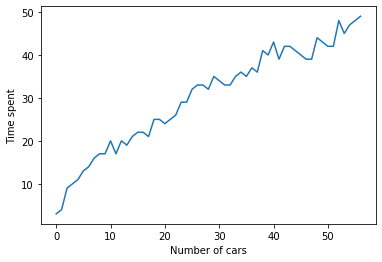

In [9]:
plt.plot(second_run[0])
plt.xlabel("Number of cars")
plt.ylabel("Time spent")

Text(0, 0.5, 'Time spent')

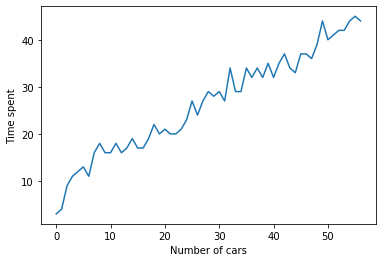

In [9]:
plt.plot(third_run[0])
plt.xlabel("Number of cars")
plt.ylabel("Time spent")

Text(0, 0.5, 'Time spent')

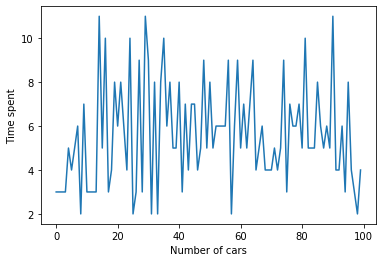

In [9]:
plt.plot(fourth_run[0])
plt.xlabel("Number of cars")
plt.ylabel("Time spent")

As you can see in the graphs above, the more resources you have the more cars the simulation is able to have in the run. This is because with more gas pumps, employees, and air pumps more cars are able to arrive and exit the gas station in a timely manner. The exception here is the second and third graphs which show the runs where one air pump is removed. From the third graph you can see the time spent is slightly lower than the second graph. The fourth graph shows many cars arriving and exiting the gas station quickly since there are so many gas pumps, employees, and air pumps.